In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [9]:
ds=pd.read_csv('C:/Users/prade/titanic_dataset.csv')

In [11]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [15]:
dsi=ds.set_index('PassengerId')
dsi

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [16]:
dsi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
dsi.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

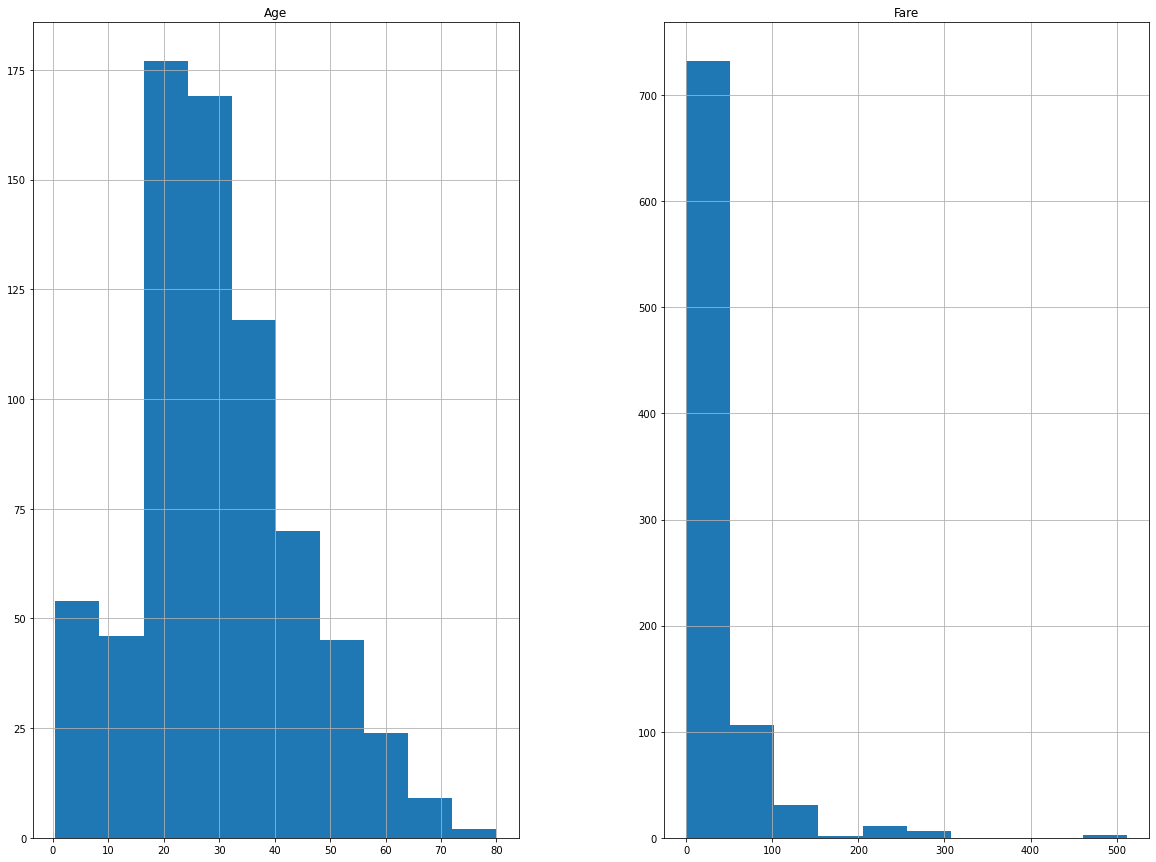

In [23]:
freqgraph=dsi.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [24]:
dsi['Age']=dsi['Age'].fillna(dsi['Age'].median())

In [25]:
dsi.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#More than 75% of the data in Cabin column is missing. So dropping that column here.

In [30]:
dsi=dsi.drop(columns=['Cabin'])

In [27]:
import statistics as st
Embarked_mode=st.mode(dsi['Embarked'])
Embarked_mode

'S'

In [28]:
dsi['Embarked']=dsi['Embarked'].fillna(Embarked_mode)

In [29]:
dsi['Embarked']


PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [31]:
dsi.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5.Check outliers and handle outliers in the given dataset

1) Dropping outliers in age column

D:\CUSTOM_INSTALLATION\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age')

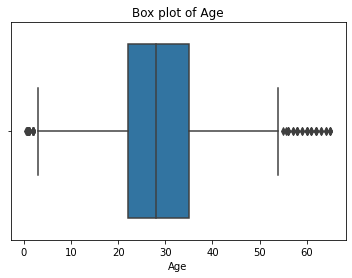

In [65]:
sns.boxplot(dsi["Age"])
plt.title("Box plot of Age")
plt.xlabel("Age")

In [67]:
dsi.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,0.387429,2.312000,28.985909,0.525714,0.385143,32.364694
std,0.487441,0.833937,12.428247,1.104480,0.809841,50.062537
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,65.000000,8.000000,6.000000,512.329200


In [68]:
Q1= 22 # Q1 and Q3 are obtained from describe function 
Q3= 35
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print("Upper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)

IQR is  13
Upper limit of normal value is 54.5
Lower limit of normal value is 2.5


It is found out that some outliers are present in age group



In [69]:
# This is used to find the outliers in the data
outliers=[]
for x in dsi["Age"]:
    if ((x>Upper_limit) or (x<Lower_Limit)):
        outliers.append(x)
print("outlier data are \n",outliers)

# to find the index of the outlier
ind1= dsi["Age"]>Upper_limit
print("index of outliers are \n",dsi.loc[ind1].index)

outlier data are 
 [2.0, 58.0, 55.0, 2.0, 65.0, 0.83, 59.0, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 2.0, 0.75, 56.0, 58.0, 60.0, 60.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 56.0]
index of outliers are 
 Int64Index([ 12,  16,  55,  95, 153, 171, 175, 196, 233, 253, 269, 276, 281,
            327, 367, 439, 457, 468, 484, 488, 546, 556, 571, 588, 626, 627,
            648, 660, 685, 695, 773, 830, 880],
           dtype='int64', name='PassengerId')


In [70]:
# to drop these data
dsi.drop([ 12,  16,  55,  95, 153, 171, 175, 196, 233, 253, 269, 276, 281,
            327, 367, 439, 457, 468, 484, 488, 546, 556, 571, 588, 626, 627,
            648, 660, 685, 695, 773, 830, 880], inplace= True)

D:\CUSTOM_INSTALLATION\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age')

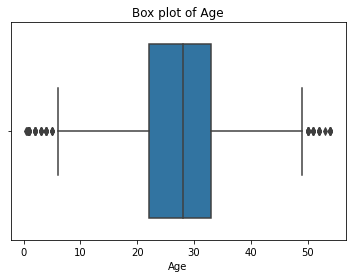

In [71]:
sns.boxplot(dsi["Age"])
plt.title("Box plot of Age")
plt.xlabel("Age")

In [72]:
Q1=dsi.Fare.quantile(.25)
Q3=dsi.Fare.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print("Upper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)

IQR is  22.496899999999997
Upper limit of normal value is 64.13804999999999
Lower limit of normal value is -25.849549999999994


In [74]:
# This is also used to find the outliers in the data
dsi[(dsi.Fare<Lower_Limit)|(dsi.Fare>Upper_limit)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C


In [75]:
df2= dsi[(dsi.Fare>Lower_Limit)&(dsi.Fare<Upper_limit)]
df2 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


This df2 is a new dataset where is all the outliers of the Fare is removed . So we can do the boxplot of this dataset



D:\CUSTOM_INSTALLATION\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fare')

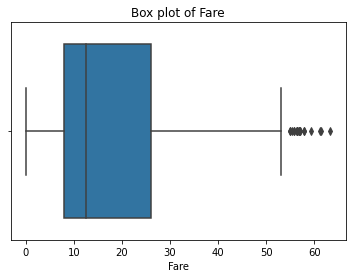

In [76]:
sns.boxplot(df2["Fare"])
plt.title("Box plot of Fare")
plt.xlabel("Fare")

We can see the outliers are reduced to a greater extend and continuing this step will eliminate all outliers



Finding outliers in Passenger class data

D:\CUSTOM_INSTALLATION\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Pclass')

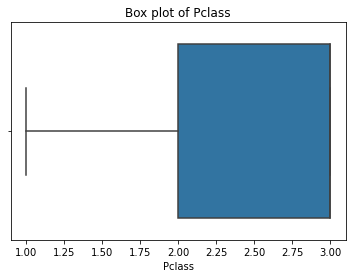

In [78]:
sns.boxplot(dsi["Pclass"])
plt.title("Box plot of Pclass")
plt.xlabel("Pclass")

No outliers are found in the column



# 6.Standard scaling on the feature Survived

In [62]:
x=dsi['Survived']
x=pd.DataFrame(x)
type(x)

pandas.core.frame.DataFrame

In [63]:
from sklearn import preprocessing
standard_scaling=preprocessing.StandardScaler()
x=standard_scaling.fit_transform(x)

In [64]:
x=pd.DataFrame(x)
x

,0
0,-0.795275
1,1.257426
2,1.257426
3,1.257426
4,-0.795275
...,...
870,-0.795275
871,1.257426
872,-0.795275
873,1.257426
